# Differential expression and gene ontolgies of endothelial integrated SEACells: Metastasis

In [1]:
import os
import logging
import shutil

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import colors
from matplotlib import rcParams

In [4]:
from gprofiler import GProfiler

In [5]:
sc.logging.print_versions()

-----
anndata     0.9.2
scanpy      1.9.2
-----
PIL                 10.0.0
anyio               NA
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
brotli              1.0.9
certifi             2023.07.22
cffi                1.15.0
charset_normalizer  3.2.0
comm                0.1.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
exceptiongroup      1.1.3
executing           1.2.0
fastjsonschema      NA
gprofiler           1.0.0
h5py                3.9.0
idna                3.4
igraph              0.10.6
importlib_resources NA
ipykernel           6.25.0
ipywidgets          8.1.0
jedi                0.19.0
jinja2              3.1.2
joblib              1.3.2
json5               NA
jsonschema          4.17.3
jupyter_events      0.6.3
jupyter_server      2.7.3
jupyterlab_server   2.24.0
kiwisolver          1.4.5
leidenalg           0

In [6]:
pwd

'/home/marta.sallese/ov_cancer_atlas/atlas_project/script/downstream/clustering/endothelial'

In [7]:
import sys
sys.path.insert(1, '/home/marta.sallese/ov_cancer_atlas/atlas_project/script/downstream/clustering/cancer')

In [8]:
from plotting_bubble import scale_data_5_75, plot_enrich 
# from plotting_bubble import plot_enrich

In [9]:
adata = sc.read('/group/testa/Project/OvarianAtlas/Integrated_data_hdg_new/seacells_endothelial_hdg_patients_batch_corr_scgen_tissuetreat.h5ad')
# adata = sc.read('/group/testa/Project/OvarianAtlas/atlas_project/raw_data/integration/metacells/seacells_endothelial_hdg_patients_batch_corr_scgen_tissuetreat.h5ad')

In [10]:
adata

AnnData object with n_obs × n_vars = 2778 × 17054
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', '_scvi_batch', '_scvi_labels', 'concat_batch'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'corrected_latent', 'latent'

In [11]:
adata.obs = adata.obs.drop(columns=['_scvi_batch', '_scvi_labels', 'concat_batch'])

In [12]:
hvg = pd.read_csv('/home/marta.sallese/ov_cancer_atlas/Atlas_scripts/HDG_new/Tables/atlas_hdg_common_dispersion_patients_endothelial.csv',  index_col=0)
# hvg = pd.read_csv('/home/marta.sallese/ov_cancer_atlas/atlas_project/script/hdg/endothelial/atlas_endothelial_hdg_dispersion_patients.csv',  index_col=0)

In [13]:
hvg[hvg.highly_variable]

,highly_variable
SAMD11,True
KLHL17,True
PLEKHN1,True
HES4,True
ISG15,True
...,...
C21orf58,True
S100B,True
MT-ND2,True
MT-CO1,True


In [14]:
hvg.highly_variable.sum()

5002

In [15]:
adata.var

""
FAM87B
LINC00115
FAM41C
SAMD11
NOC2L
...
MT-ND4L
MT-ND4
MT-ND5
MT-ND6


In [16]:
adata.var['highly_variable']=hvg.highly_variable

In [17]:
adata.var

,highly_variable
FAM87B,False
LINC00115,False
FAM41C,False
SAMD11,True
NOC2L,False
...,...
MT-ND4L,False
MT-ND4,False
MT-ND5,False
MT-ND6,False


In [18]:
adata.var.highly_variable = adata.var.highly_variable.fillna(False)

In [19]:
adata.var

,highly_variable
FAM87B,False
LINC00115,False
FAM41C,False
SAMD11,True
NOC2L,False
...,...
MT-ND4L,False
MT-ND4,False
MT-ND5,False
MT-ND6,False


In [20]:
# you can skip this passage if you specify use_highly_variable = True when computing embeddings
# adata.raw = adata
# adata = adata[:, adata.var.highly_variable]

In [21]:
adata.var_names

Index(['FAM87B', 'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       'HES4', 'ISG15', 'AGRN',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=17054)

In [22]:
cell_cycle_genes = [x.strip() for x in open('/home/marta.sallese/ov_cancer_atlas/regev_lab_cell_cycle_genes.txt')]

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [23]:
adata.obs

,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location,dataset,SEACell,# Single Cells,tissue-treatment,S_score,G2M_score,phase
SEACell_patient_tissue,,,,,,,,,,,,,,
SEACell-8_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-8,55,Metastasis_CHT,0.104870,0.029123,S
SEACell-6_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-6,97,Metastasis_CHT,-0.278455,-0.382995,G1
SEACell-3_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-3,40,Metastasis_CHT,0.066609,-0.050996,S
SEACell-5_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-5,84,Metastasis_CHT,0.101556,0.029559,S
SEACell-7_Geistlinger_59_Metastasis,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum,Geistlinger,SEACell-7,97,Metastasis_CHT,-0.290593,-0.484180,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEACell-26_Vasquez_118_Primary,Primary,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Ovary,Vasquez,SEACell-26,55,Primary_Naive,-0.430463,-0.612138,G1
SEACell-26_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-26,18,Metastasis_Naive,-0.612018,-0.779111,G1
SEACell-38_Vasquez_118_Metastasis,Metastasis,Advanced stage,Naive,Unknown,IVB,Vasquez_118,Peritoneum,Vasquez,SEACell-38,10,Metastasis_Naive,-0.644089,-0.845210,G1


### Metastasis

In [24]:
adata_mt = adata[(adata.obs['tissue'] == 'Metastasis')]

In [25]:
adata_mt

View of AnnData object with n_obs × n_vars = 1453 × 17054
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', 'S_score', 'G2M_score', 'phase'
    var: 'highly_variable'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'corrected_latent', 'latent'

In [26]:
sc.tl.pca(adata_mt, use_highly_variable = True)

In [27]:
sc.pp.neighbors(adata_mt, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata_mt)

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marta.sallese/miniconda3/envs/gprofiler/lib/

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


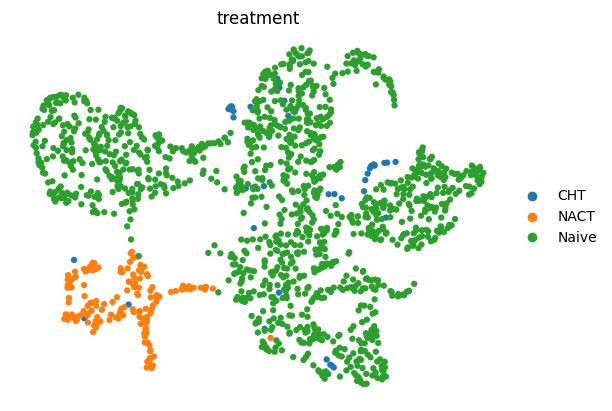

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


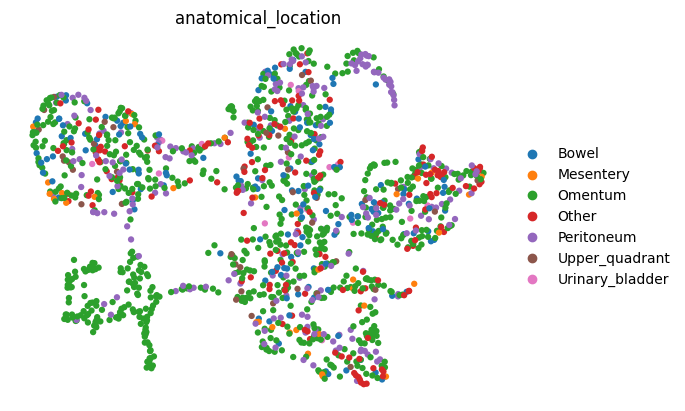

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


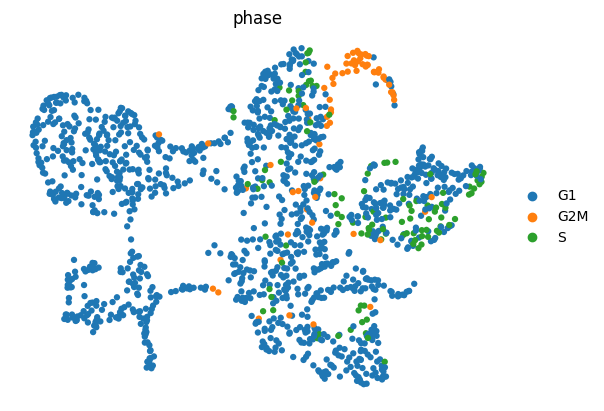

In [28]:
sc.pl.umap(adata_mt, color=["treatment"], frameon=False)
sc.pl.umap(adata_mt, color=["anatomical_location"], frameon=False)
sc.pl.umap(adata_mt, color=["phase"], frameon=False)

In [29]:
leidenTotal=[]
for i in np.arange(0.01, 2.0, 0.1):
    sc.tl.leiden(adata_mt,resolution = i,key_added="leiden-{}".format(round(i,2)))
    leidenTotal.append("leiden-{}".format(round(i,2)))

In [30]:
leidenTotal

['leiden-0.01',
 'leiden-0.11',
 'leiden-0.21',
 'leiden-0.31',
 'leiden-0.41',
 'leiden-0.51',
 'leiden-0.61',
 'leiden-0.71',
 'leiden-0.81',
 'leiden-0.91',
 'leiden-1.01',
 'leiden-1.11',
 'leiden-1.21',
 'leiden-1.31',
 'leiden-1.41',
 'leiden-1.51',
 'leiden-1.61',
 'leiden-1.71',
 'leiden-1.81',
 'leiden-1.91']

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


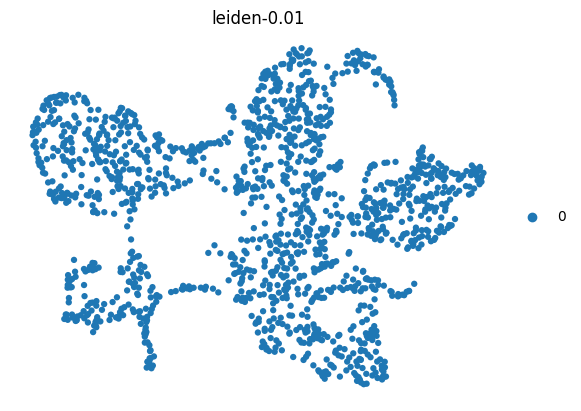

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


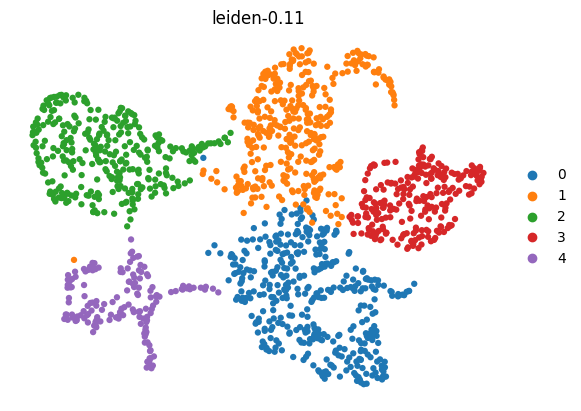

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


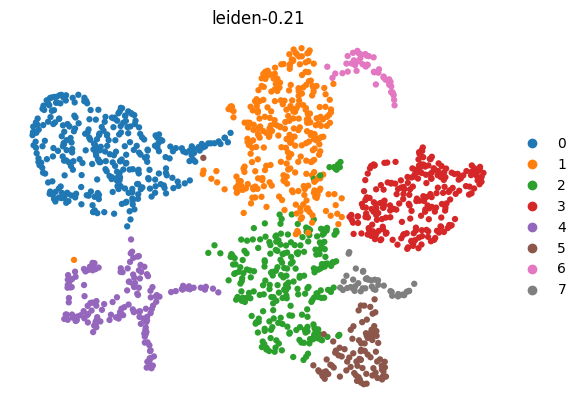

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


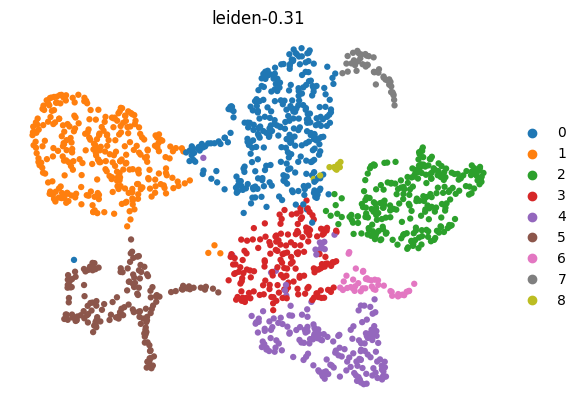

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


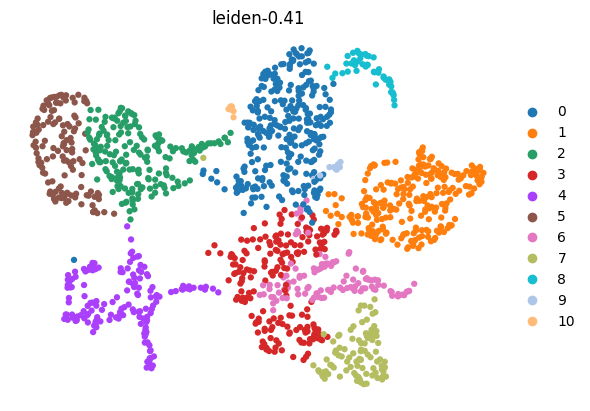

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


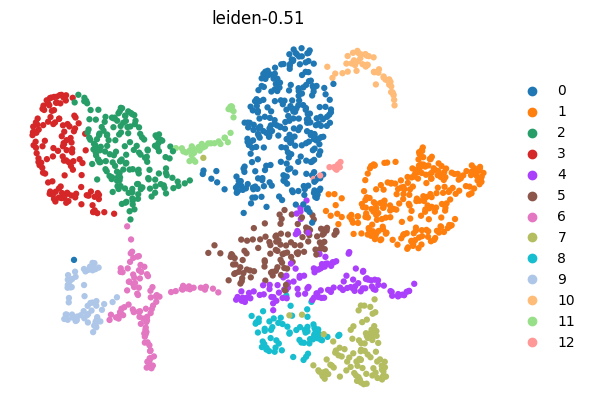

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


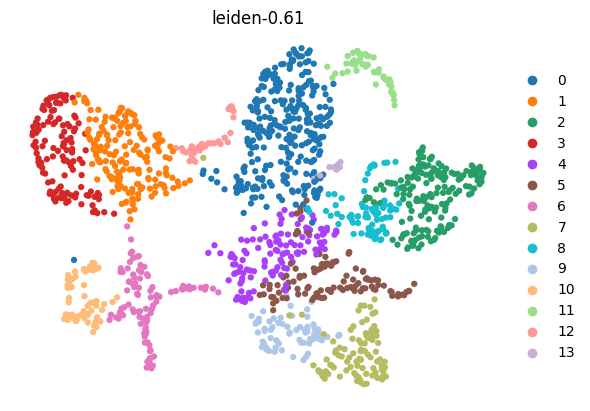

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


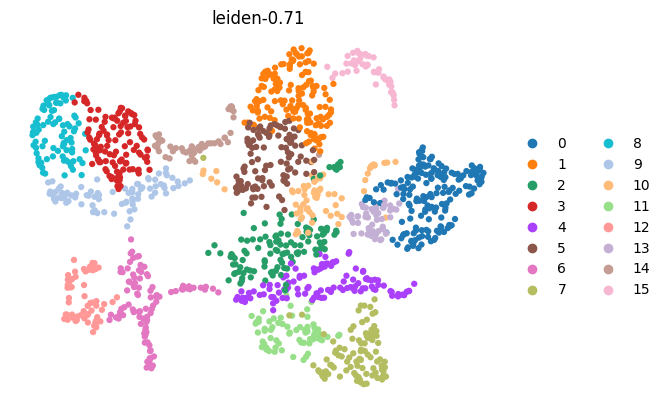

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


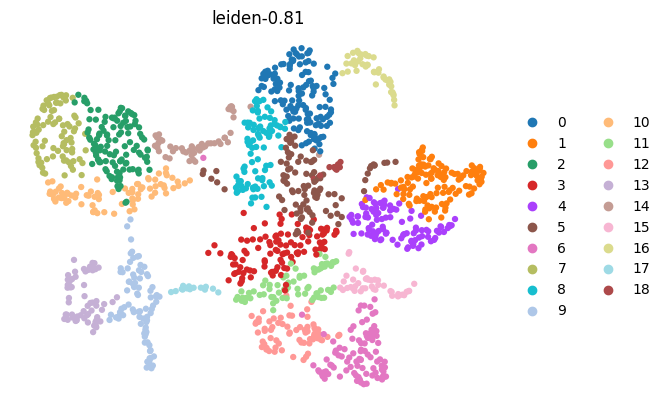

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


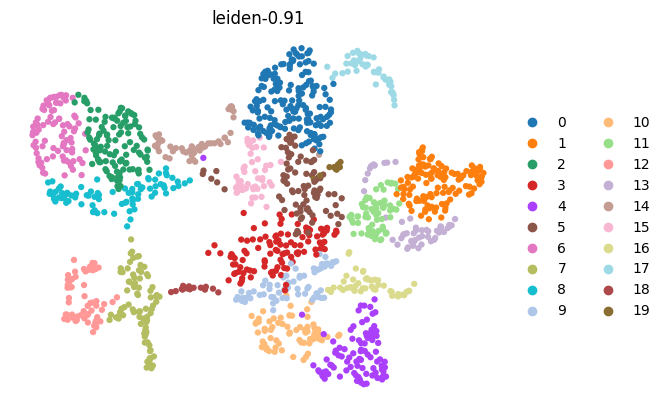

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


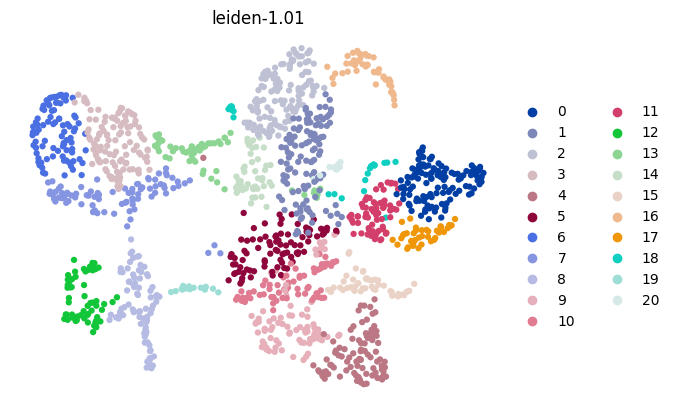

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


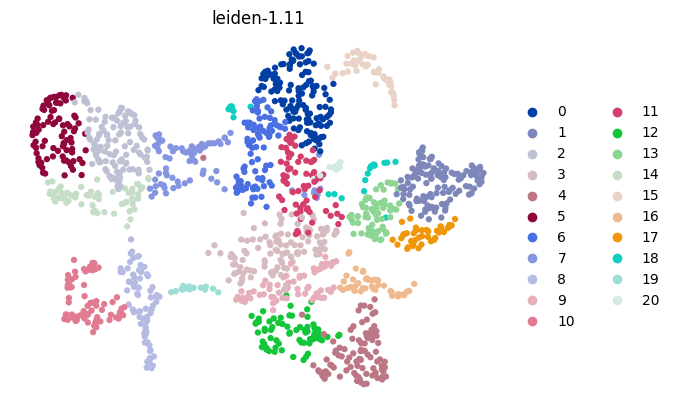

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


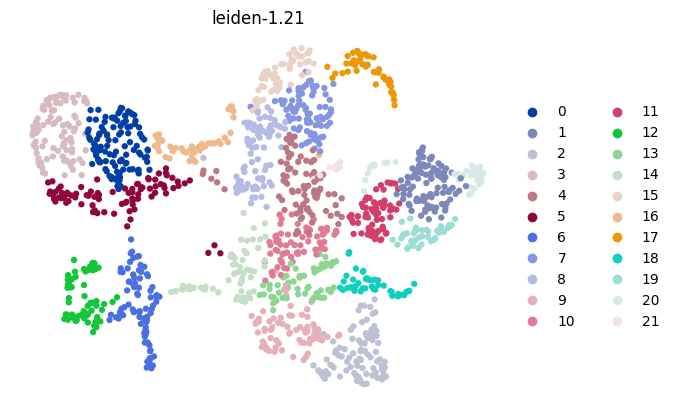

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


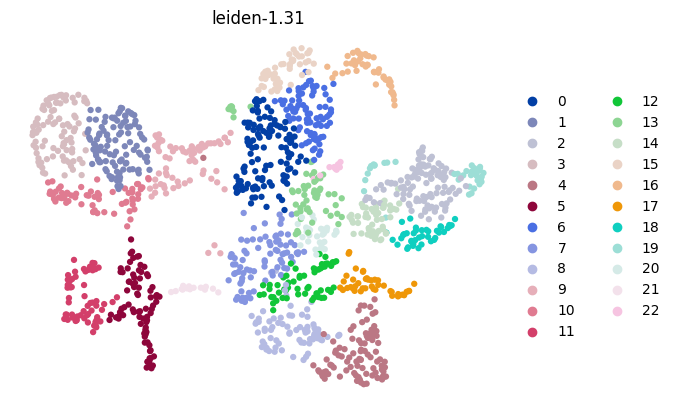

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


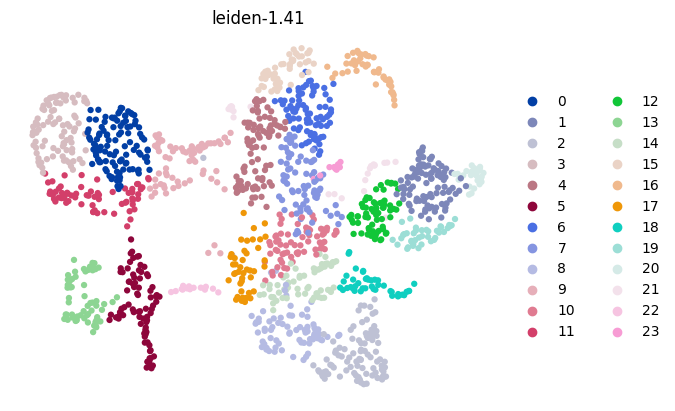

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


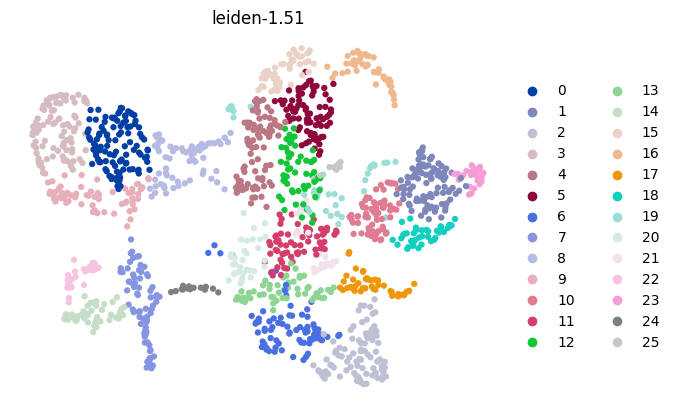

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


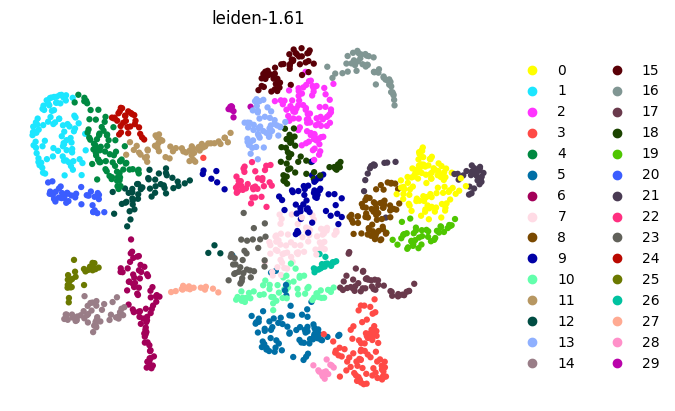

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


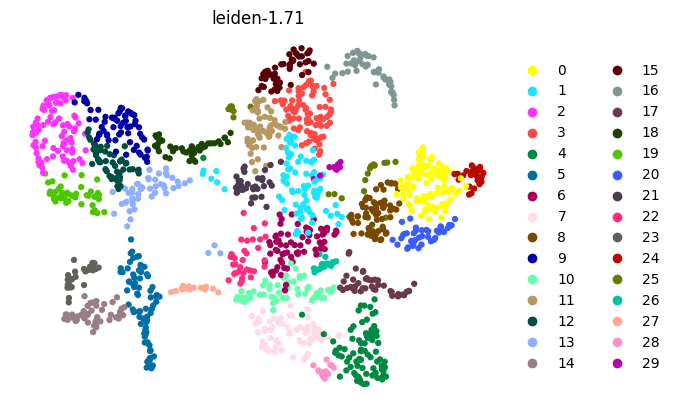

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


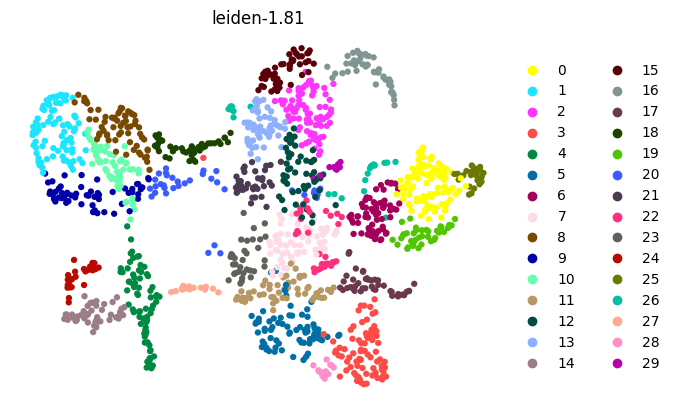

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


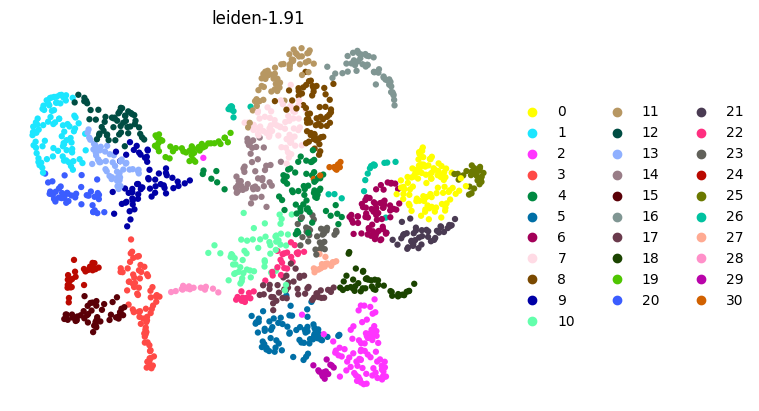

In [31]:
for i in leidenTotal:
   sc.pl.umap(adata_mt, color=i, frameon=False) 

In [30]:
dedf={}
for lei in leidenTotal:
    dedf[lei]={}
    sc.tl.rank_genes_groups(adata_mt, groupby=lei, method='wilcoxon', key_added = "wilcoxon_"+lei)
    for cl in adata_mt.obs[lei].unique():
        dedf[lei][cl] = sc.get.rank_genes_groups_df(adata_mt, group=cl, key ='wilcoxon_'+lei)

/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/marta.sallese/miniconda3/envs/gprofiler/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning

In [31]:
directory_root = "/home/marta.sallese/ov_cancer_atlas/atlas_project/script/downstream/clustering/cancer/metastasis/"

errorDic={}
log_file = directory_root + 'metastasis.log'

# Check if the log exists
if os.path.isfile(log_file):
# If it doesn't exist, create it
    os.remove(log_file)

logging.basicConfig(filename=log_file, level=logging.INFO) 
                    # format='%(metastasis)s %(levelname)s %(name)s %(message)s')
logger=logging.getLogger(__name__)

for lei in leidenTotal:
    errorDic[lei]={}
    directory = directory_root + lei
    # Check if the directory exists
    if not os.path.exists(directory):
        # If it doesn't exist, create it
        os.makedirs(directory)
    else:
        shutil.rmtree(directory)
        os.makedirs(directory)
    for cl in adata_mt.obs[lei].unique():
        dedf[lei][cl] = sc.get.rank_genes_groups_df(adata_mt, group=cl, key ='wilcoxon_'+lei)
        dedf[lei][cl].to_csv(directory + '/rank_gene_groups_df_' + cl + '.csv')
        try:
            # print(dedf[lei][cl])
            threshold1 = dedf[lei][cl].dropna(axis='rows')
            threshold2 = threshold1.loc[(threshold1['logfoldchanges'] > 1) & (threshold1['logfoldchanges'] < 100), :]
            threshold3 = threshold2.loc[threshold2['scores'] > 5, :]
            threshold4 = threshold3.loc[threshold3['pvals_adj'] < 0.05, :]
            # break
            print('{}_{}_{}_{}'.format(lei, cl, threshold4.shape[0], threshold4.scores.min()))
            # ontologia di (dedf[lei][cl])
            gp = GProfiler(return_dataframe=True)
            query = threshold4.names.to_list()
            ontology = gp.profile(organism='hsapiens', 
                                    query=query, 
                                    no_evidences=False, 
                                    background=adata_mt.var_names.to_list(),
                                    sources=['GO:CC', 'GO:BP', 'GO:MF','REAC','KEGG'])
            ontology.to_csv(directory + '/gprofiler_' + cl + '.csv')
            if ontology.shape[0] > 0:
                plot_enrich(ontology, filename=directory + '/ontology_' + cl + '.png')
            else:
                logger.info('leiden {} cluster {}'.format(lei, cl))
                logger.info('ontology empty')
            
            
            errorDic[lei][cl]={}

        except Exception as e:
            errorDic[lei][cl]=e
            # with open(directory + '/ontology_' + cl + '.log', 'w') as f:
            #     f.write('error')
            logger.info('leiden {} cluster {}'.format(lei, cl))
            logger.error(e)
            continue

logging.shutdown()


leiden-0.01_1_7269_5.002665996551514
leiden-0.01_0_1529_5.046420574188232
leiden-0.11_4_7183_5.007425785064697
leiden-0.11_0_328_5.316192150115967
leiden-0.11_2_13790_5.224450588226318
leiden-0.11_1_69_6.266566276550293
leiden-0.11_3_923_5.105982303619385
leiden-0.11_5_507_5.012197971343994
leiden-0.11_6_65_5.015347957611084
leiden-0.21_5_7183_5.007425785064697
leiden-0.21_1_424_5.062452793121338
leiden-0.21_0_13670_5.144429683685303
leiden-0.21_2_90_5.29813289642334
leiden-0.21_3_61_5.729166507720947
leiden-0.21_4_718_5.126187324523926
leiden-0.21_6_507_5.012197971343994
leiden-0.21_7_65_5.015347957611084
leiden-0.21_8_13699_5.0005574226379395
leiden-0.31_7_5873_5.007884502410889
leiden-0.31_4_1096_5.322155952453613
leiden-0.31_0_13493_5.021003246307373
leiden-0.31_2_66_5.299495697021484
leiden-0.31_1_80_5.167355537414551
leiden-0.31_3_696_5.450872421264648
leiden-0.31_6_56_5.327732086181641
leiden-0.31_8_501_5.023075580596924
leiden-0.31_5_107_5.0417656898498535
leiden-0.31_9_11361_5

In [32]:
logging.shutdown()

In [33]:
adata_mt.write_h5ad('/group/testa/Project/OvarianAtlas/atlas_project/raw_data/downstream/clustering/cancer/adata_metastasis_embeddings.h5ad')